## Observations and Insights 

There seems to be an almost equal distribution of male mice (51%) and female mice (49%). This could be potentially beneficial to the experiment's future goals in order to analyze whether the effects are similar depending on the gender of the mice.

In the mouse that I chose to analyze (s185) I noticed that Capomulin caused the size of the tumor to decrease as the timepoints increase, indicating that Capomulin was effective in reducing the volume of the tumor.

There seems to be a positive correlation between the size of the tumor and the weights of the mice, which would be useful later on to see whether the effects of the treatments are rendered more or less effective due to the weight of the mouse.

In [348]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")


# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [349]:
# Checking the number of mice.
total_mice = len(combined_data["Mouse ID"].unique())
total_mice


249

In [350]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])]

#duplicate_data[["Mouse ID", "Timepoint"]]
a = duplicate_data.loc[:, "Mouse ID"]
b = a.values
c = np.unique(b)
c




array(['g989'], dtype=object)

In [351]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicates = combined_data[combined_data['Mouse ID'].isin(c)]
duplicate_data



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [352]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned = combined_data[~combined_data['Mouse ID'].isin(c)]
cleaned

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [353]:
# Checking the number of mice in the clean DataFrame.
total_unique_mice_results = len(cleaned["Mouse ID"].unique())
total_unique_mice_results

248

## Summary Statistics

In [354]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_vol = cleaned[["Drug Regimen", "Tumor Volume (mm3)"]]
tumor_vol_group = tumor_vol.groupby(["Drug Regimen"])

tumor_mean = tumor_vol_group.mean()
tumor_mean = tumor_mean.rename(columns={"Tumor Volume (mm3)": "Mean"})

tumor_median = tumor_vol_group.median()
tumor_median = tumor_median.rename(columns={"Tumor Volume (mm3)": "Median"})

tumor_var = tumor_vol_group.var()
tumor_var = tumor_var.rename(columns={"Tumor Volume (mm3)": "Var"})

tumor_std = tumor_vol_group.std()
tumor_std = tumor_std.rename(columns={"Tumor Volume (mm3)": "Std"})

tumor_sem = tumor_vol_group.sem()
tumor_sem = tumor_sem.rename(columns={"Tumor Volume (mm3)": "SEM"})

tumor_df1 = pd.merge(tumor_mean, tumor_median, on="Drug Regimen")
tumor_df2 = pd.merge(tumor_df1, tumor_var, on="Drug Regimen")
tumor_df3 = pd.merge(tumor_df2, tumor_std, on="Drug Regimen")
tumor_df = pd.merge(tumor_df3, tumor_sem, on="Drug Regimen")

tumor_df

,Mean,Median,Var,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [355]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

tumor_df_aggregate = tumor_vol_group.aggregate(['mean', 'median', 'var', 'std', 'sem'])
tumor_df_aggregate



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Number of Timepoints per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total Number of Timepoints'>

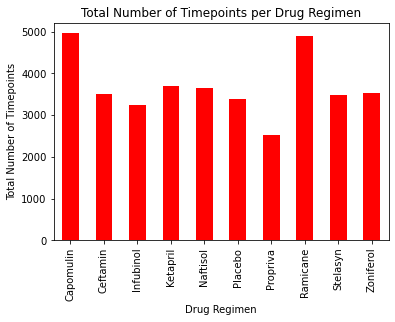

In [356]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
tumor_vol_time = cleaned[["Drug Regimen", "Timepoint"]]
tumor_vol_time_group = tumor_vol_time.groupby(["Drug Regimen"])
tumor_vol_time_sum = tumor_vol_time_group.sum()

x_axis = np.arange(0, len(tumor_vol_time_group["Drug Regimen"]))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

tumor_vol_time_sum.plot(kind="bar", facecolor="red", title="Total Number of Timepoints per Drug Regimen", xlabel= "Drug Regimen", ylabel="Total Number of Timepoints", legend=False)



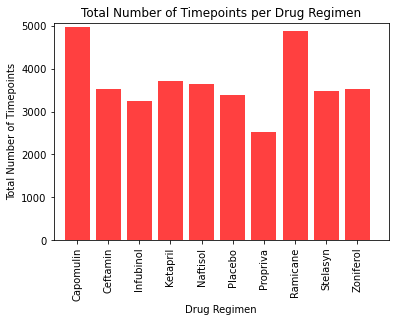

In [357]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
tumor_vol_time_sum = tumor_vol_time_group.sum().reset_index()

plt.title("Total Number of Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints")

plt.xlim(-0.75, len(tumor_vol_time_group["Drug Regimen"]))
plt.ylim(0, max(tumor_vol_time_sum["Timepoint"])+100)

plt.bar(x_axis, tumor_vol_time_sum["Timepoint"], facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, tumor_vol_time_sum["Drug Regimen"], rotation=90)
plt.show()



Text(0, 0.5, '')

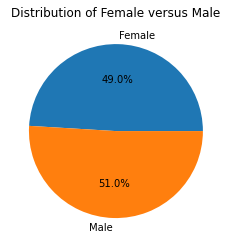

In [358]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_only = cleaned[["Mouse ID", "Sex"]]
sex_groups = sex_only.groupby("Sex")
sex_amount = sex_groups.count()

sex_pie = sex_amount.plot(kind="pie", y="Mouse ID", title="Distribution of Female versus Male", autopct="%1.1f%%", legend=False)
sex_pie.set_ylabel("")

Text(0.5, 1.0, 'Distribution of Female vs Male')

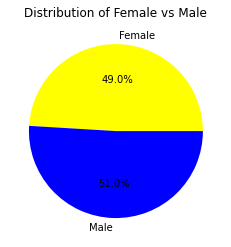

In [359]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_noindex = sex_amount.reset_index()

sex_label = sex_noindex["Sex"]
sex_number = sex_noindex["Mouse ID"]
colors = ["yellow", "blue"]

plt.pie(sex_number, labels=sex_label, colors=colors, autopct="%1.1f%%")
plt.title("Distribution of Female vs Male")




## Quartiles, Outliers and Boxplots

In [360]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

four_drugs_only = cleaned[cleaned["Drug Regimen"].isin(drugs)]
four_drug_condense = four_drugs_only[["Drug Regimen", "Mouse ID", "Timepoint"]]
four_drug_group = four_drug_condense.groupby(["Drug Regimen", "Mouse ID"]).max()    

merged_four_drugs = pd.merge(four_drug_group, four_drugs_only, on=["Timepoint", "Mouse ID"]).set_index("Mouse ID")
merged_four_drugs


,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
b128,45,Capomulin,Female,9,22,38.982878,2
b742,45,Capomulin,Male,7,21,38.939633,0
f966,20,Capomulin,Male,16,17,30.485985,0
g288,45,Capomulin,Male,3,19,37.074024,1
g316,45,Capomulin,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...
s508,45,Ramicane,Male,1,17,30.276232,0
u196,45,Ramicane,Male,18,25,40.667713,3
w678,5,Ramicane,Female,5,24,43.166373,0


In [362]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds


treatments = merged_four_drugs["Drug Regimen"].unique()

tumor_vol_data = []

for x in treatments:
    specific_treatment_vol = []
    for index, rows in merged_four_drugs.iterrows():
        if x == rows["Drug Regimen"]:
            specific_treatment_vol.append(rows["Tumor Volume (mm3)"])
    tumor_vol_data.append(specific_treatment_vol)
    last = pd.DataFrame(specific_treatment_vol)

    quartiles = last[0].quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    median = quartiles[0.5]
    iqr = upperq - lowerq

    
    print(f"The interquartile range of tumor volume data treated by {x} is {iqr}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers")
    print(f"Values above {upper_bound} could be outliers")
    print("")
    

The interquartile range of tumor volume data treated by Capomulin is 7.781863460000004
Values below 20.70456164999999 could be outliers
Values above 51.83201549 could be outliers

The interquartile range of tumor volume data treated by Ceftamin is 15.577752179999997
Values below 25.355449580000002 could be outliers
Values above 87.66645829999999 could be outliers

The interquartile range of tumor volume data treated by Infubinol is 11.477135160000003
Values below 36.83290494999999 could be outliers
Values above 82.74144559000001 could be outliers

The interquartile range of tumor volume data treated by Ramicane is 9.098536719999998
Values below 17.912664470000003 could be outliers
Values above 54.30681135 could be outliers



{'whiskers': [<matplotlib.lines.Line2D at 0x1e1b5965d90>,
 'caps': [<matplotlib.lines.Line2D at 0x1e1b59445e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e1b5965ca0>,
 'medians': [<matplotlib.lines.Line2D at 0x1e1b5944fa0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e1ab3459d0>,
 'means': []}

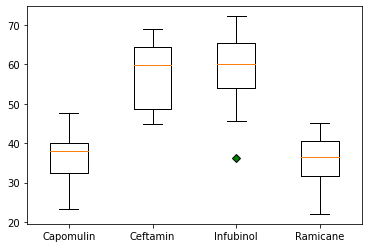

In [363]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()

ax.boxplot(tumor_vol_data, labels = treatments,flierprops = green_diamond)

## Line and Scatter Plots

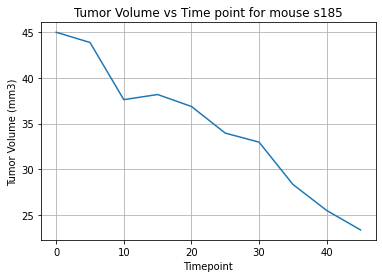

In [364]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = cleaned[cleaned["Drug Regimen"].isin(["Capomulin"])]
mouse = capomulin[capomulin["Mouse ID"].isin(["s185"])]
mouse_data = mouse[["Timepoint", "Tumor Volume (mm3)"]]

x_axis = mouse_data[["Timepoint"]]
y_axis = mouse_data[["Tumor Volume (mm3)"]]

plt.plot(x_axis, y_axis)

plt.title("Tumor Volume vs Time point for mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.grid()

plt.show()

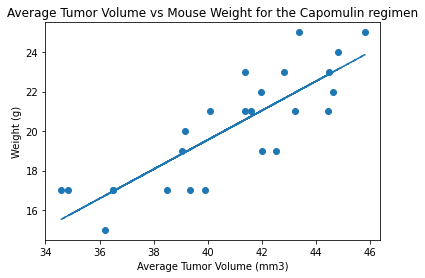

In [365]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin
mouse_ID = capomulin.groupby("Mouse ID")
average_mouse_ID = mouse_ID.mean()

avg_tumor_vol = average_mouse_ID[["Tumor Volume (mm3)"]]
mouse_weight = average_mouse_ID[["Weight (g)"]]

plt.scatter(avg_tumor_vol, mouse_weight)

plt.title("Average Tumor Volume vs Mouse Weight for the Capomulin regimen")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Weight (g)")

w_slope, w_int, w_r, w_p, w_std_err = st.linregress(avg_tumor_vol.squeeze(), mouse_weight.squeeze())
w_fit = w_slope * avg_tumor_vol.squeeze() + w_int

plt.plot(avg_tumor_vol.squeeze(),w_fit,"--")

plt.show()

## Correlation and Regression

In [366]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(st.pearsonr(avg_tumor_vol.squeeze(), mouse_weight.squeeze())[0], 2)}")


The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84
